
# Assignment 2: Code for data modelling report

In [1]:
#fill in your code here
#use comments as necesary to help your marker follow your work
#use the + button to add new code cells. This will help you separate your work and run it chunk by chunk

# ** 1. Loading the Dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score, adjusted_rand_score 
import plotly.express as px
import plotly.graph_objects as go
!pip install --upgrade plotly
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 15.2 MB 8.6 MB/s eta 0:00:01    |█████▏                          | 2.4 MB 8.6 MB/s eta 0:00:02
  Attempting uninstall: plotly
    Found existing installation: plotly 5.8.1
    Uninstalling plotly-5.8.1:
      Successfully uninstalled plotly-5.8.1
You should consider upgrading via the '/usr/local/bin/python3.6 -m pip install --upgrade pip' command.


In [3]:
df1 = pd.read_csv("A2_HR_Employee_Data.csv")
df1

EmployeeID  Age Resigned     BusinessTravel BusinessUnit  \
0           2824   41      Yes      Travel_Rarely        Sales   
1           1409   49       No  Travel_Frequently  Consultants   
2           5506   37      Yes      Travel_Rarely  Consultants   
3           5012   33       No  Travel_Frequently  Consultants   
4           4657   27       No      Travel_Rarely  Consultants   
...          ...  ...      ...                ...          ...   
1465        7940   36       No  Travel_Frequently  Consultants   
1466        1886   39       No      Travel_Rarely  Consultants   
1467        3868   27       No      Travel_Rarely  Consultants   
1468        7925   49       No  Travel_Frequently        Sales   
1469        5556   34       No      Travel_Rarely  Consultants   

      EducationLevel  Gender  JobSatisfaction MaritalStatus  MonthlyIncome  \
0                  2  Female                4        Single           5993   
1                  1    Male                2       Married           5130   
2                  2    Male                3        Single           2090   
3                  4  Female                3       Married           2909   
4                  1    Male                2       Married           3468   
...              ...     ...              ...           ...            ...   
1465               2    Male                4       Married           2571   
1466               1    Male                1       Married           9991   
1467               3    Male                2       Married           6142   
1468               3    Male                2       Married           5390   
1469               3    Male                3       Married           4404   

      ...  PercentSalaryHike PerformanceRating  AverageWeeklyHoursWorked  \
0     ...                 11                 3                      63.0   
1     ...                 23                 4                      40.0   
2     ...                 15                 3                      50.0   
3     ...                 11                 3                      48.0   
4     ...                 12                 3                      40.0   
...   ...                ...               ...                       ...   
1465  ...                 17                 3                      40.0   
1466  ...                 15                 3                      40.0   
1467  ...                 20                 4                      49.0   
1468  ...                 14                 3                      40.0   
1469  ...                 12                 3                      40.0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInRole  YearsSinceLastPromotion  \
0                  6            4                        0   
1                 10            7                        1   
2                  0            0                        0   
3                  8            7                        3   
4                  2            2                        2   
...              ...          ...                      ...   
1465               5            2                        0   
1466               7            7                        1   


# ** 2. Exploratory Analysis**

 ### ** Explore Each Column Using Descriptive Analytics/Graphs**

<Figure size 432x288 with 0 Axes>

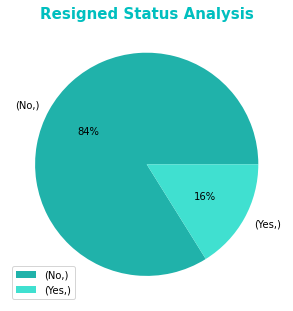

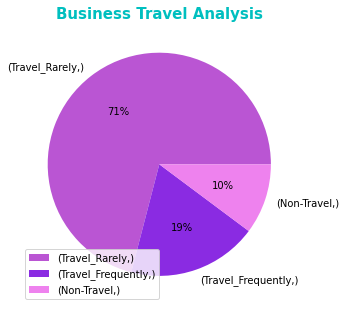

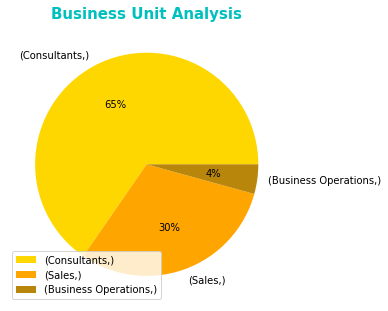

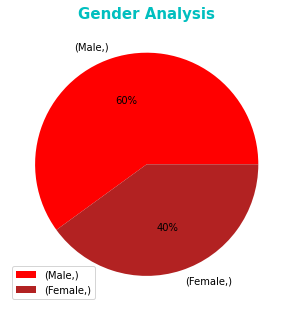

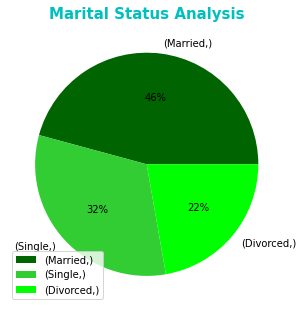

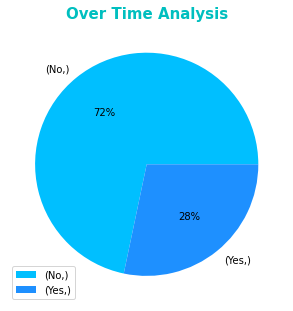

In [4]:
plt.figure(0)
colors = [ 'lightseagreen', 'turquoise']
fig, ax = plt.subplots(figsize=(5,15))
ax.set_title('Resigned Status Analysis',fontsize=15, color = 'c',fontweight='bold')
ax = df1.iloc[:,[2]].value_counts().plot.pie(autopct='%1.0f%%', colors = colors)
ax.set_ylabel("")
plt.legend (loc=3)


plt.figure(1)
colors = [ 'mediumorchid', 'blueviolet','violet']
fig, ax = plt.subplots(figsize=(5,15))
ax.set_title('Business Travel Analysis',fontsize=15, color = 'c',fontweight='bold')
ax = df1.iloc[:,[3]].value_counts().plot.pie(autopct='%1.0f%%', colors = colors)
ax.set_ylabel("")
plt.legend (loc=3)

plt.figure(2)
colors = [ 'gold', 'orange','darkgoldenrod']
fig, ax = plt.subplots(figsize=(5,15))
ax.set_title('Business Unit Analysis',fontsize=15, color = 'c',fontweight='bold')
ax = df1.iloc[:,[4]].value_counts().plot.pie(autopct='%1.0f%%', colors = colors)
ax.set_ylabel("")
plt.legend (loc=3)

plt.figure(3)
colors = [ 'red', 'firebrick']
fig, ax = plt.subplots(figsize=(5,15))
ax.set_title('Gender Analysis',fontsize=15, color = 'c',fontweight='bold')
ax = df1.iloc[:,[6]].value_counts().plot.pie(autopct='%1.0f%%', colors = colors)
ax.set_ylabel("")
plt.legend (loc=3)

plt.figure(4)
colors = [ 'darkgreen', 'limegreen','lime']
fig, ax = plt.subplots(figsize=(5,15))
ax.set_title('Marital Status Analysis',fontsize=15, color = 'c',fontweight='bold')
ax = df1.iloc[:,[8]].value_counts().plot.pie(autopct='%1.0f%%', colors = colors)
ax.set_ylabel("")
plt.legend (loc=3)

plt.figure(5)
colors = [ 'deepskyblue', 'dodgerblue']
fig, ax = plt.subplots(figsize=(5,15))
ax.set_title('Over Time Analysis',fontsize=15, color = 'c',fontweight='bold')
ax = df1.iloc[:,[11]].value_counts().plot.pie(autopct='%1.0f%%', colors = colors)
ax.set_ylabel("")
plt.legend (loc=3)

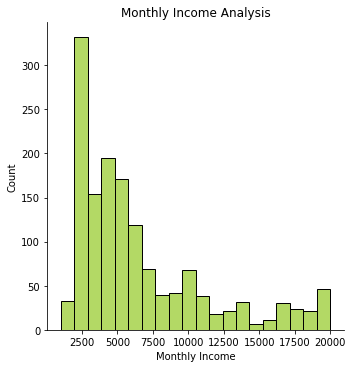

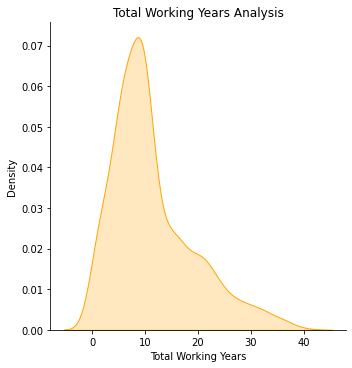

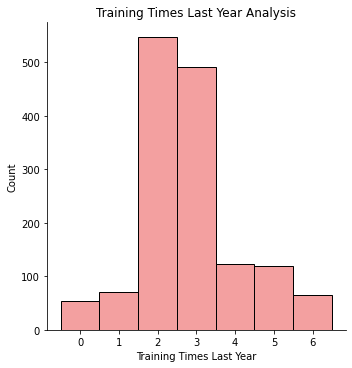

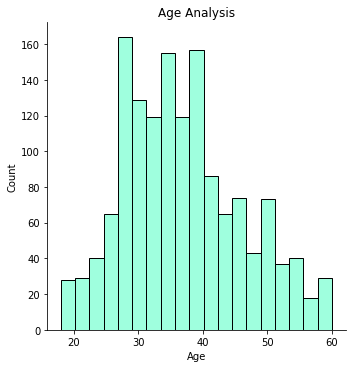

In [5]:
sns.displot(data=df1, x= df1["MonthlyIncome"], color = 'yellowgreen').set(title="Monthly Income Analysis", xlabel = "Monthly Income")

sns.displot(data=df1, x=df1["TotalWorkingYears"],color="orange",kind="kde", fill=True).set(title="Total Working Years Analysis", xlabel = "Total Working Years")

sns.displot(data=df1, x=df1["TrainingTimesLastYear"],discrete=True,color="lightcoral").set(title="Training Times Last Year Analysis", xlabel = "Training Times Last Year")

sns.displot(data=df1, x= df1["Age"], color = 'aquamarine').set(title="Age Analysis", xlabel = "Age")



/usr/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 28.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


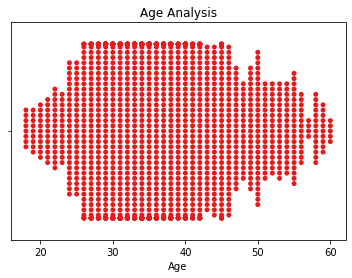

In [6]:
sns.swarmplot (x= df1["Age"], palette ="Set1").set(title="Age Analysis", xlabel = "Age")
sns.set(rc={'figure.figsize':(6,6)},style ="white")

[Text(0.5, 1.0, 'Years at Company Analysis'), Text(0.5, 0, 'Years at Company')]

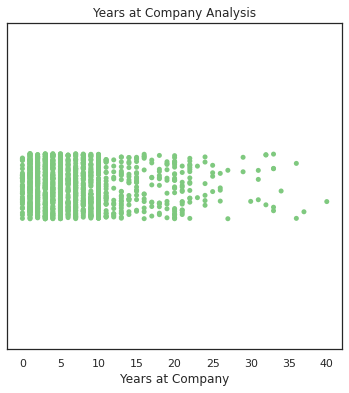

In [7]:
sns.stripplot(data = df1 , x=df1['YearsAtCompany'],palette ="Accent" ).set(title="Years at Company Analysis", xlabel = "Years at Company")

Text(0.5, 1.0, 'Education Level Analysis')

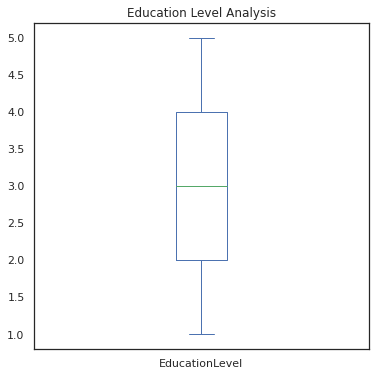

In [8]:
df1["EducationLevel"].plot.box()
plt.title ('Education Level Analysis')

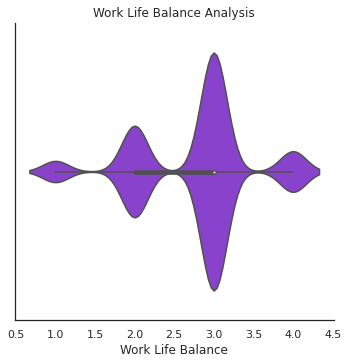

In [9]:

sns.catplot( x = "WorkLifeBalance", kind="violin",
            color="blueviolet", edgecolor=".6",
            data=df1).set(title="Work Life Balance Analysis", xlabel = "Work Life Balance")

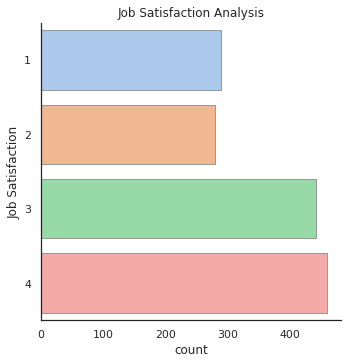

In [10]:
sns.catplot( y = "JobSatisfaction", kind="count",
            palette="pastel", edgecolor=".6",
            data=df1).set(title="Job Satisfaction Analysis", ylabel = "Job Satisfaction")

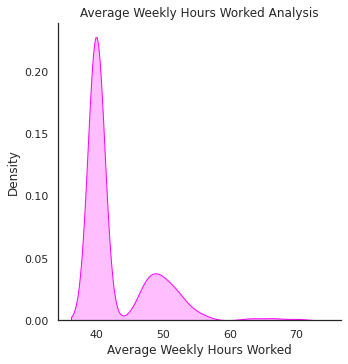

In [11]:
sns.displot(df1, x="AverageWeeklyHoursWorked", kind="kde", fill = True, color = "fuchsia").set(title="Average Weekly Hours Worked Analysis", xlabel = "Average Weekly Hours Worked")

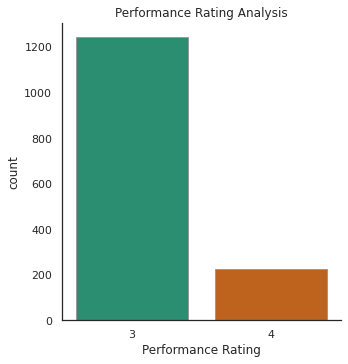

In [12]:
sns.catplot( x = "PerformanceRating", kind="count",
            palette="Dark2", edgecolor=".6",
            data=df1).set(title="Performance Rating Analysis", xlabel = "Performance Rating")

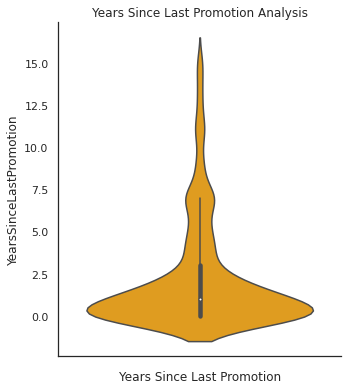

In [13]:
sns.catplot( y = "YearsSinceLastPromotion", kind="violin",
            color="orange", edgecolor=".6",
            data=df1).set(title="Years Since Last Promotion Analysis", xlabel = "Years Since Last Promotion")

[Text(0.5, 1.0, 'Years With Current Manager Analysis'),
 Text(0.5, 0, 'Years With Current Manager')]

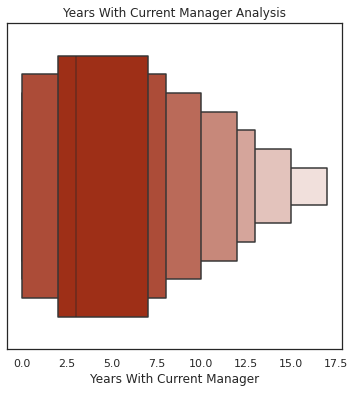

In [14]:
sns.boxenplot(x="YearsWithCurrManager",
              palette ="gnuplot",
              scale="linear", data=df1).set(title="Years With Current Manager Analysis", xlabel = "Years With Current Manager")

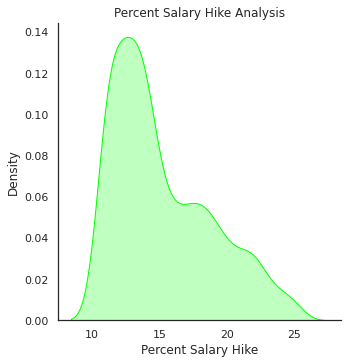

In [15]:
sns.displot(df1, x="PercentSalaryHike", kind="kde", fill = True, color = "lime").set(title="Percent Salary Hike Analysis", xlabel = "Percent Salary Hike")

 ### ** Explore Relationships Between All Pairs Of Attributes Using A Graph**

In [16]:
df4 = df1.copy()

df4.drop = df4.drop(df4.iloc[:,[0,3,4,5,10,11,12,13,15,16,17,18,19,20,21]], axis = 1,inplace = True) 

df4



Age Resigned  Gender  JobSatisfaction MaritalStatus  MonthlyIncome  \
0      41      Yes  Female                4        Single           5993   
1      49       No    Male                2       Married           5130   
2      37      Yes    Male                3        Single           2090   
3      33       No  Female                3       Married           2909   
4      27       No    Male                2       Married           3468   
...   ...      ...     ...              ...           ...            ...   
1465   36       No    Male                4       Married           2571   
1466   39       No    Male                1       Married           9991   
1467   27       No    Male                2       Married           6142   
1468   49       No    Male                2       Married           5390   
1469   34       No    Male                3       Married           4404   

      AverageWeeklyHoursWorked  
0                         63.0  
1                         40.0  
2                         50.0  
3                         48.0  
4                         40.0  
...                        ...  
1465                      40.0  
1466                      40.0  
1467                      49.0  
1468                      40.0  
1469                      40.0  

[1470 rows x 7 columns]

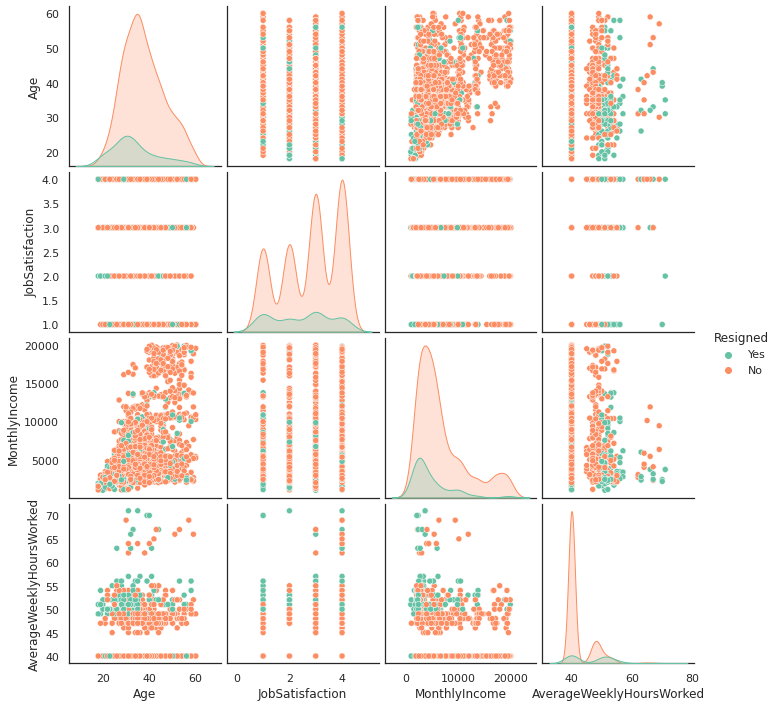

In [17]:
sns.pairplot(df4, kind="scatter", hue="Resigned", palette="Set2")
plt.show()

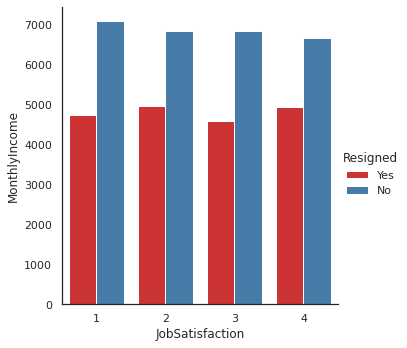

In [18]:
 g= sns.catplot(x="JobSatisfaction", y="MonthlyIncome",
                 hue="Resigned",palette="Set1",
                 data=df1, kind="bar", ci = None);



In [19]:

fig = px.sunburst(df1,
                  path=["Gender", "MaritalStatus","BusinessUnit"],
                  values='MonthlyIncome',
                  width=750, height=750,
                  color_continuous_scale="Spectral",
                  color='MonthlyIncome',
                  title="Monthly Income per Gender per Business Unit per Resigned "
                  )
fig.show()

In [20]:

fig = px.sunburst(df1,
                  path=["Resigned","Gender","BusinessUnit"],
                  values='MonthlyIncome',
                  width=750, height=750,
                  color_continuous_scale="Spectral",
                  color='MonthlyIncome',
                  title="Monthly Income per Gender per Business Unit per Resigned "
                  )
fig.show()

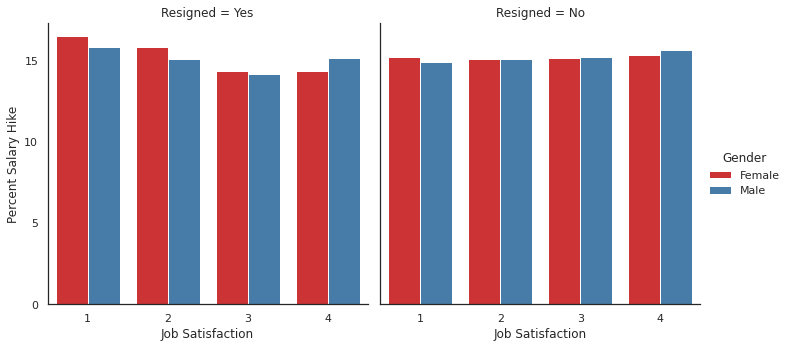

In [21]:
 g= sns.catplot(x="JobSatisfaction", y="PercentSalaryHike",
                 hue="Gender", col="Resigned",palette="Set1",
                 data=df1, kind="bar", ci = None);
sns.set(style = "white", font_scale=3)
g.set_axis_labels ("Job Satisfaction", "Percent Salary Hike");

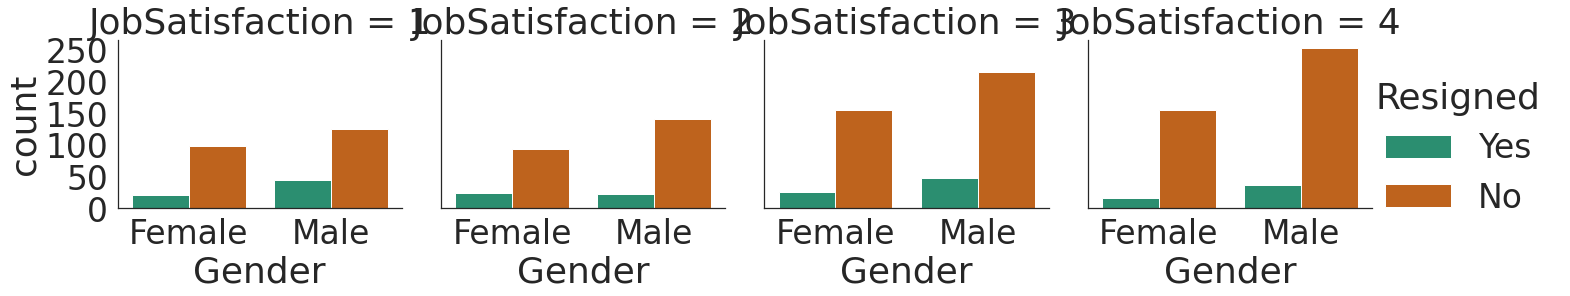

In [22]:
g = sns.catplot(x="Gender", col="JobSatisfaction",hue = "Resigned",palette="Dark2",
                data=df1,
                kind="count")
sns.set(style = "white")


/usr/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/lib/python3.7/site-packages/seaborn/distributions.py:1718: UserWarning:

`shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.



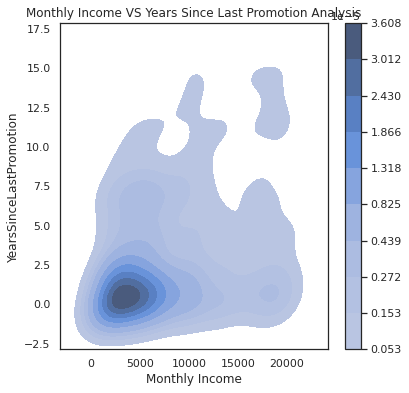

In [23]:

g = sns.kdeplot (df1.MonthlyIncome,df1.YearsSinceLastPromotion, shade = True, shade_lowest = False, cbar = True).set(title="Monthly Income VS Years Since Last Promotion Analysis", xlabel = "Monthly Income")
sns.set(style = "white")



<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Count'>

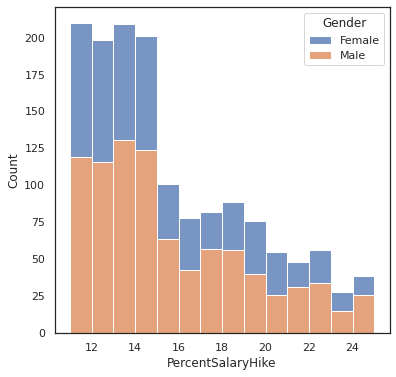

In [24]:
sns.histplot (x = 'PercentSalaryHike',
 data = df1, hue = "Gender",  multiple = "stack" )

/usr/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

44.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

58.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

68.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

77.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning:

83.0% of the p

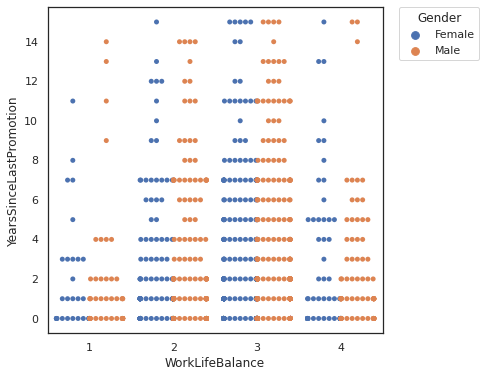

In [25]:
g= sns.swarmplot ( x= df1.WorkLifeBalance , y = df1.YearsSinceLastPromotion, hue = df1.Gender,dodge = True)
sns.move_legend(g, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

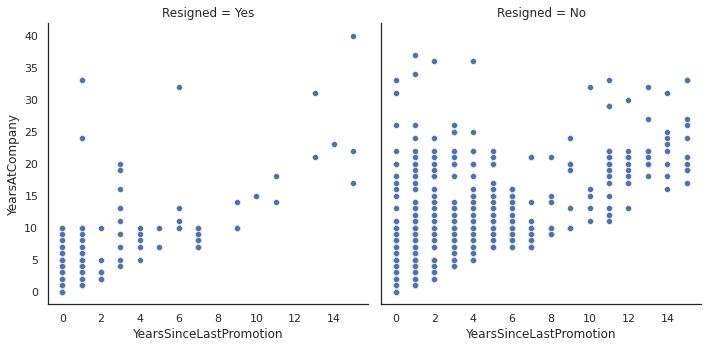

In [26]:
sns.relplot(x= "YearsSinceLastPromotion", y = "YearsAtCompany",data = df1, col = "Resigned",palette ="RdBu" )

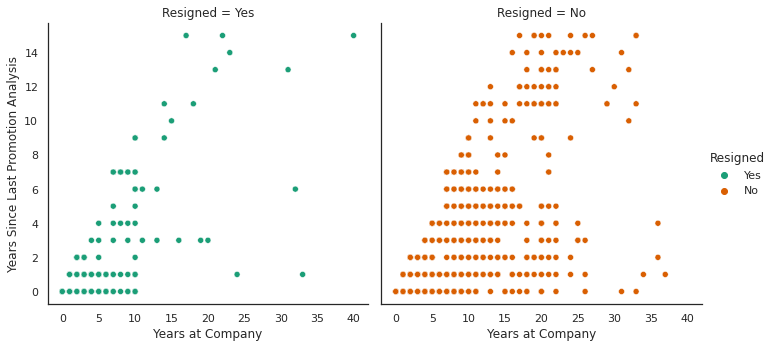

In [27]:
g= sns.relplot(x= "YearsAtCompany", y = "YearsSinceLastPromotion",data = df1, hue ="Resigned",col = "Resigned",palette ="Dark2" ).set(xlabel = "Years at Company",ylabel = "Years Since Last Promotion Analysis")



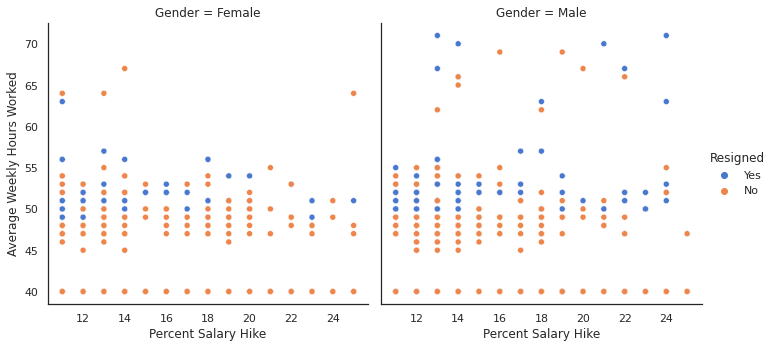

In [28]:
g= sns.relplot(x= "PercentSalaryHike", y = "AverageWeeklyHoursWorked",data = df1, hue ="Resigned",col = "Gender",palette ="muted" ).set(xlabel = "Percent Salary Hike",ylabel = "Average Weekly Hours Worked")


In [29]:
df_text = df1.copy()

df_text.drop = df_text.drop(df_text.iloc[:,[0,1,5,7,9,10,12,13,14,15,16,17,18,19,20,21]], axis = 1,inplace = True) 
df_text

Resigned     BusinessTravel BusinessUnit  Gender MaritalStatus OverTime
0         Yes      Travel_Rarely        Sales  Female        Single      Yes
1          No  Travel_Frequently  Consultants    Male       Married       No
2         Yes      Travel_Rarely  Consultants    Male        Single      Yes
3          No  Travel_Frequently  Consultants  Female       Married      Yes
4          No      Travel_Rarely  Consultants    Male       Married       No
...       ...                ...          ...     ...           ...      ...
1465       No  Travel_Frequently  Consultants    Male       Married       No
1466       No      Travel_Rarely  Consultants    Male       Married       No
1467       No      Travel_Rarely  Consultants    Male       Married      Yes
1468       No  Travel_Frequently        Sales    Male       Married       No
1469       No      Travel_Rarely  Consultants    Male       Married       No

[1470 rows x 6 columns]

In [30]:
print(df1.Gender)

0       Female
1         Male
2         Male
3       Female
4         Male
         ...  
1465      Male
1466      Male
1467      Male
1468      Male
1469      Male
Name: Gender, Length: 1470, dtype: object


# ** 3. K - means on the Dataset**

## ** Model 1 - Finding the Suitable K - means using Elbow Method and Silhouette Method**

### ** Transform the Categorical Values to Numerical in the Dataset**

In [31]:
df_all_numeric = df1.copy()

le = LabelEncoder ()

df_all_numeric ['Gender_Code'] = le.fit_transform(df_all_numeric.Gender)
df_all_numeric ['Resigned_Code'] = le.fit_transform(df_all_numeric.Resigned)
df_all_numeric ['BusinessTravel_Code'] = le.fit_transform(df_all_numeric.BusinessTravel)
df_all_numeric ['BusinessUnit_Code'] = le.fit_transform(df_all_numeric.BusinessUnit)
df_all_numeric ['MaritalStatus_Code'] = le.fit_transform(df_all_numeric.MaritalStatus)
df_all_numeric ['OverTime_Code'] = le.fit_transform(df_all_numeric.OverTime)
df_all_numeric

EmployeeID  Age Resigned     BusinessTravel BusinessUnit  \
0           2824   41      Yes      Travel_Rarely        Sales   
1           1409   49       No  Travel_Frequently  Consultants   
2           5506   37      Yes      Travel_Rarely  Consultants   
3           5012   33       No  Travel_Frequently  Consultants   
4           4657   27       No      Travel_Rarely  Consultants   
...          ...  ...      ...                ...          ...   
1465        7940   36       No  Travel_Frequently  Consultants   
1466        1886   39       No      Travel_Rarely  Consultants   
1467        3868   27       No      Travel_Rarely  Consultants   
1468        7925   49       No  Travel_Frequently        Sales   
1469        5556   34       No      Travel_Rarely  Consultants   

      EducationLevel  Gender  JobSatisfaction MaritalStatus  MonthlyIncome  \
0                  2  Female                4        Single           5993   
1                  1    Male                2       Married           5130   
2                  2    Male                3        Single           2090   
3                  4  Female                3       Married           2909   
4                  1    Male                2       Married           3468   
...              ...     ...              ...           ...            ...   
1465               2    Male                4       Married           2571   
1466               1    Male                1       Married           9991   
1467               3    Male                2       Married           6142   
1468               3    Male                2       Married           5390   
1469               3    Male                3       Married           4404   

      ...  YearsAtCompany YearsInRole  YearsSinceLastPromotion  \
0     ...               6           4                        0   
1     ...              10           7                        1   
2     ...               0           0                        0   
3     ...               8           7                        3   
4     ...               2           2                        2   
...   ...             ...         ...                      ...   
1465  ...               5           2                        0   
1466  ...               7           7                        1   
1467  ...               6           2                        0   
1468  ...               9           6                        0   
1469  ...               4           3                        1   

      YearsWithCurrManager  Gender_Code  Resigned_Code  BusinessTravel_Code  \
0                        5            0              1                    2   
1                        7            1              0                    1   
2                        0            1              1                    2   
3                        0            0              0                    1   
4                        2            1              0                    2   
...                    ...          ...            ...                  ...   
1465                     3            1              0                    1   
1466                     7            1              0                    2   
1467                     3            1              0                    2   
1468                     8            1              0                    1   
1469                     2            1              0                    2   

      BusinessUnit_Code  MaritalStatus_Code  OverTime_Code  
0                     2                   2              1  
1                     1                   1              0  
2                     1                   2              1  
3                     1                   1              1  
4                     1                   1              0  
...                 ...                 ...            ...  
1465                  1                   1              0  
1466                  1                   1   

### ** Dropping the Categorical Values and Subseting a new Dataset**

In [32]:
df_numeric_Dataset =df_all_numeric.copy()

df_numeric_Dataset.drop = df_numeric_Dataset.drop (df_numeric_Dataset.iloc[:,[2,3,4,6,8,11]], axis = 1,inplace = True) 

df_numeric_Dataset



EmployeeID  Age  EducationLevel  JobSatisfaction  MonthlyIncome  \
0           2824   41               2                4           5993   
1           1409   49               1                2           5130   
2           5506   37               2                3           2090   
3           5012   33               4                3           2909   
4           4657   27               1                2           3468   
...          ...  ...             ...              ...            ...   
1465        7940   36               2                4           2571   
1466        1886   39               1                1           9991   
1467        3868   27               3                2           6142   
1468        7925   49               3                2           5390   
1469        5556   34               3                3           4404   

      NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0                      8                 11                  3   
1                      1                 23                  4   
2                      6                 15                  3   
3                      1                 11                  3   
4                      9                 12                  3   
...                  ...                ...                ...   
1465                   4                 17                  3   
1466                   4                 15                  3   
1467                   1                 20                  4   
1468                   2                 14                  3   
1469                   2                 12                  3   

      AverageWeeklyHoursWorked  TotalWorkingYears  ...  YearsAtCompany  \
0                         63.0                  8  ...               6   
1                         40.0                 10  ...              10   
2                         50.0                  7  ...               0   
3                         48.0                  8  ...               8   
4                         40.0                  6  ...               2   
...                        ...                ...  ...             ...   
1465                      40.0                 17  ...               5   
1466                      40.0                  9  ...               7   
1467                      49.0                  6  ...               6   
1468                      40.0                 17  ...               9   
1469                      40.0                  6  ...               4   

      YearsInRole  YearsSinceLastPromotion  YearsWithCurrManager  Gender_Code  \
0               4                        0                     5            0   
1               7                        1                     7            1   
2               0                        0                     0            1   
3               7                        3                     0            0   
4               2                        2                     2            1   
...           ...                      ...                   ...          ...   
1465            2                        0                     3            1   
1466            7                        1                     7            1   
1467            2                        0                     3            1   
1468            6                        0                     8            1   
1469            3                        1                     2            1   

      Resigned_Code  BusinessTravel_Code  BusinessUnit_Code  \
0                 1                    2                  2   
1                 0                    1                  1   
2                 1                    2                  1   
3                 0                    1                  1   
4                 0                    2                  1   
...             ...                  ...                ...   
1465              0              

### ** Running the Elbow Method and Silhouette Method to identify the most appropriate number for K - means - Model 1**

In [33]:
def plot_elbow_graph(dataset, k_range=range(1, 11)): 

    # A list holds the inertia values for each k 

    inertia_lst = [] 

    for k in k_range: 

        km_model = KMeans(n_clusters=k, random_state=42) 

        km_model.fit(dataset) 

        inertia_lst.append(km_model.inertia_) 

    plt.figure(figsize=(10,6)) 

    plt.plot(k_range, inertia_lst) 

    plt.xticks(k_range) 

    plt.xlabel("Number of Clusters") 

    plt.ylabel("Inertia") 

    plt.show()

In [34]:
def plot_silhouette_graph(dataset, k_range=range(2, 11)): 

    # A list holds the silhouette coefficients for each k 

    silhouette_coefficients = [] 

    for k in k_range: 

        km_model = KMeans(n_clusters=k, random_state=42) 

        km_model.fit(dataset) 

        score = silhouette_score(dataset, km_model.labels_) 

        silhouette_coefficients.append(score) 

    plt.figure(figsize=(10,6)) 

    plt.plot(k_range, silhouette_coefficients) 

    plt.xticks(k_range) 

    plt.xlabel("Number of Clusters") 

    plt.ylabel("Silhouette Coefficient") 

    plt.show()

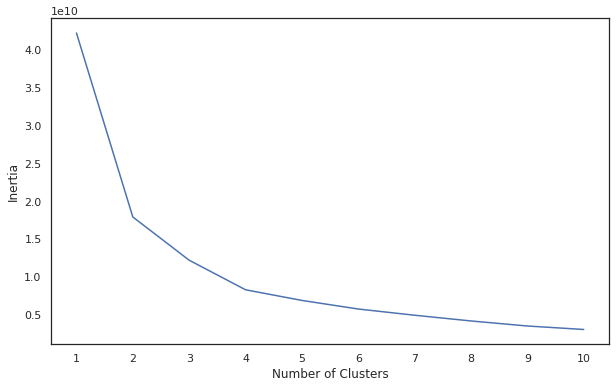

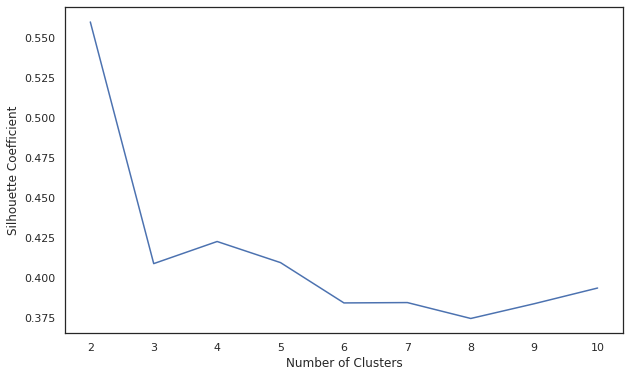

In [35]:
plot_elbow_graph(df_numeric_Dataset, k_range=range(1, 11)) 

plot_silhouette_graph(df_numeric_Dataset, k_range=range(2, 11)) 

## ** Model 1 Plots**

### **Running the code to Instantiate the model and group data into clusters**

In [36]:
km_model1 = KMeans(n_clusters=4, random_state=2).fit(df_numeric_Dataset)
clusters1 = km_model1.predict(df_numeric_Dataset)
clusters1


array([2, 2, 0, ..., 2, 0, 0], dtype=int32)

### **Add the cluster results to the Dataset**

In order to not to damage the original dataset creating a copy of the dataset and then adding the cluster column to it.

In [37]:
km_1_df = df1.copy()
km_1_df

EmployeeID  Age Resigned     BusinessTravel BusinessUnit  \
0           2824   41      Yes      Travel_Rarely        Sales   
1           1409   49       No  Travel_Frequently  Consultants   
2           5506   37      Yes      Travel_Rarely  Consultants   
3           5012   33       No  Travel_Frequently  Consultants   
4           4657   27       No      Travel_Rarely  Consultants   
...          ...  ...      ...                ...          ...   
1465        7940   36       No  Travel_Frequently  Consultants   
1466        1886   39       No      Travel_Rarely  Consultants   
1467        3868   27       No      Travel_Rarely  Consultants   
1468        7925   49       No  Travel_Frequently        Sales   
1469        5556   34       No      Travel_Rarely  Consultants   

      EducationLevel  Gender  JobSatisfaction MaritalStatus  MonthlyIncome  \
0                  2  Female                4        Single           5993   
1                  1    Male                2       Married           5130   
2                  2    Male                3        Single           2090   
3                  4  Female                3       Married           2909   
4                  1    Male                2       Married           3468   
...              ...     ...              ...           ...            ...   
1465               2    Male                4       Married           2571   
1466               1    Male                1       Married           9991   
1467               3    Male                2       Married           6142   
1468               3    Male                2       Married           5390   
1469               3    Male                3       Married           4404   

      ...  PercentSalaryHike PerformanceRating  AverageWeeklyHoursWorked  \
0     ...                 11                 3                      63.0   
1     ...                 23                 4                      40.0   
2     ...                 15                 3                      50.0   
3     ...                 11                 3                      48.0   
4     ...                 12                 3                      40.0   
...   ...                ...               ...                       ...   
1465  ...                 17                 3                      40.0   
1466  ...                 15                 3                      40.0   
1467  ...                 20                 4                      49.0   
1468  ...                 14                 3                      40.0   
1469  ...                 12                 3                      40.0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInRole  YearsSinceLastPromotion  \
0                  6            4                        0   
1                 10            7                        1   
2                  0            0                        0   
3                  8            7                        3   
4                  2            2                        2   
...              ...          ...                      ...   
1465               5            2                        0   
1466               7            7                        1   


### **Add a new column to the Dataframe and assign it the Cluster Lables**

In [38]:
km_1_df ['cluster1'] = clusters1
km_1_df

EmployeeID  Age Resigned     BusinessTravel BusinessUnit  \
0           2824   41      Yes      Travel_Rarely        Sales   
1           1409   49       No  Travel_Frequently  Consultants   
2           5506   37      Yes      Travel_Rarely  Consultants   
3           5012   33       No  Travel_Frequently  Consultants   
4           4657   27       No      Travel_Rarely  Consultants   
...          ...  ...      ...                ...          ...   
1465        7940   36       No  Travel_Frequently  Consultants   
1466        1886   39       No      Travel_Rarely  Consultants   
1467        3868   27       No      Travel_Rarely  Consultants   
1468        7925   49       No  Travel_Frequently        Sales   
1469        5556   34       No      Travel_Rarely  Consultants   

      EducationLevel  Gender  JobSatisfaction MaritalStatus  MonthlyIncome  \
0                  2  Female                4        Single           5993   
1                  1    Male                2       Married           5130   
2                  2    Male                3        Single           2090   
3                  4  Female                3       Married           2909   
4                  1    Male                2       Married           3468   
...              ...     ...              ...           ...            ...   
1465               2    Male                4       Married           2571   
1466               1    Male                1       Married           9991   
1467               3    Male                2       Married           6142   
1468               3    Male                2       Married           5390   
1469               3    Male                3       Married           4404   

      ...  PerformanceRating AverageWeeklyHoursWorked  TotalWorkingYears  \
0     ...                  3                     63.0                  8   
1     ...                  4                     40.0                 10   
2     ...                  3                     50.0                  7   
3     ...                  3                     48.0                  8   
4     ...                  3                     40.0                  6   
...   ...                ...                      ...                ...   
1465  ...                  3                     40.0                 17   
1466  ...                  3                     40.0                  9   
1467  ...                  4                     49.0                  6   
1468  ...                  3                     40.0                 17   
1469  ...                  3                     40.0                  6   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInRole  \
0                         0                1               6            4   
1                         3                3              10            7   
2                         3                3               0            0   
3                         3                3               8            7   
4                         3                3               2            2   
...                     ...              ...             ...          ...   
1465                      3                3               5            2   
1466                      5                3               7            7   
1467                      0                3               6            2   
1468                      3                2               9            6   
1469                      3                4               4            3   

      YearsSinceLastPromotion  YearsWithCurrManager  cluster1  
0                           0                     5         2  
1                           1                     7         2  
2                           0                     0         0  
3                           3                     0         2  
4                           2                     2         2  
...                       ...                   ...   

### **Understanding the Clusters by different variables**

In [39]:
km_1_df.loc[:,['cluster1','Gender']].value_counts().sort_index()

cluster1  Gender
0         Female    219
          Male      298
1         Female     57
          Male       83
2         Female    203
          Male      346
3         Female    109
          Male      155
dtype: int64

### **Understanding the Cluster Centeroids**

Understanding the cluster centeroids to out put into the plot to make it more meaningful

In [40]:
print(km_model1.cluster_centers_)
km_model1.cluster_centers_.shape

[[7.66702708e+03 3.45802708e+01 2.85299807e+00 2.79110251e+00
  4.04548356e+03 2.51257253e+00 1.53636364e+01 3.16827853e+00
  4.30444874e+01 8.23210832e+00 2.83752418e+00 2.74468085e+00
  5.33075435e+00 3.46034816e+00 1.58027079e+00 3.42746615e+00
  5.76402321e-01 1.79883946e-01 1.61315280e+00 1.25918762e+00
  1.14119923e+00 2.78529981e-01]
 [5.59020000e+03 4.74428571e+01 3.10000000e+00 2.72142857e+00
  1.78862214e+04 3.32142857e+00 1.49857143e+01 3.15000000e+00
  4.24071429e+01 2.57214286e+01 2.70714286e+00 2.82142857e+00
  1.40642857e+01 6.49285714e+00 4.62142857e+00 6.27857143e+00
  5.92857143e-01 3.57142857e-02 1.69285714e+00 1.15714286e+00
  9.85714286e-01 2.50000000e-01]
 [3.22441712e+03 3.47668488e+01 2.89617486e+00 2.68306011e+00
  4.03628597e+03 2.54098361e+00 1.50856102e+01 3.14025501e+00
  4.30910747e+01 8.24043716e+00 2.80327869e+00 2.75774135e+00
  5.49180328e+00 3.61566485e+00 1.55373406e+00 3.57377049e+00
  6.30236794e-01 1.83970856e-01 1.57923497e+00 1.21311475e+00
  1.

(4, 22)

### **Plotting with subplots**

Text(0.5, 1.0, 'Original data')

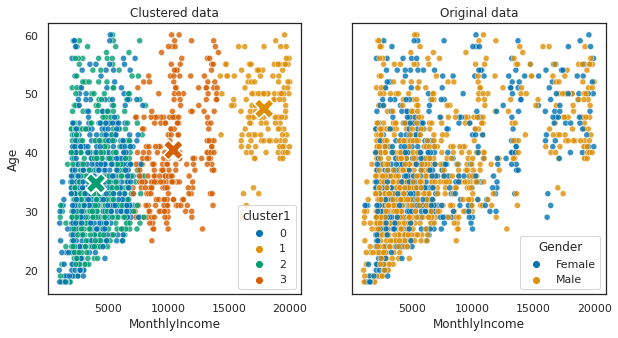

In [41]:
# setting the subplots, figure size and shared axes. the function returns a figure object and an array of axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharex=True, sharey=True)
# creating a scatterplot of the clustered data on the first sub-axes 
sns.scatterplot(data=km_1_df, x='MonthlyIncome', y='Age', hue='cluster1', palette='colorblind', ax=axes[0], alpha=0.8)
# creating another scatter plot of the centroids on the first sub-axes
sns.scatterplot(x=km_model1.cluster_centers_[:,4], y=km_model1.cluster_centers_[:,1], hue=range(4), palette='colorblind', ax=axes[0], legend=False, marker='X',s=400)
# setting the title for the first sub-axes
axes[0].set_title('Clustered data')

# creating a scatterplot of the true labeled data on the second sub-axes 
sns.scatterplot(data=km_1_df, x='MonthlyIncome', y='Age', hue='Gender', palette='colorblind', ax=axes[1],alpha=0.8)
# setting the title for the second sub-axes
axes[1].set_title('Original data')

## ** Model 2 - Finding the Suitable K - means using Elbow Method and Silhouette Method**

### ** Dateset with only Numerical Values for Model 2**

In [42]:
df2 = df1.copy ()
df2.drop (['Resigned','BusinessTravel','BusinessUnit','Gender','MaritalStatus','OverTime'], axis = 1, inplace = True)
df3=df2.copy()
df3

EmployeeID  Age  EducationLevel  JobSatisfaction  MonthlyIncome  \
0           2824   41               2                4           5993   
1           1409   49               1                2           5130   
2           5506   37               2                3           2090   
3           5012   33               4                3           2909   
4           4657   27               1                2           3468   
...          ...  ...             ...              ...            ...   
1465        7940   36               2                4           2571   
1466        1886   39               1                1           9991   
1467        3868   27               3                2           6142   
1468        7925   49               3                2           5390   
1469        5556   34               3                3           4404   

      NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0                      8                 11                  3   
1                      1                 23                  4   
2                      6                 15                  3   
3                      1                 11                  3   
4                      9                 12                  3   
...                  ...                ...                ...   
1465                   4                 17                  3   
1466                   4                 15                  3   
1467                   1                 20                  4   
1468                   2                 14                  3   
1469                   2                 12                  3   

      AverageWeeklyHoursWorked  TotalWorkingYears  TrainingTimesLastYear  \
0                         63.0                  8                      0   
1                         40.0                 10                      3   
2                         50.0                  7                      3   
3                         48.0                  8                      3   
4                         40.0                  6                      3   
...                        ...                ...                    ...   
1465                      40.0                 17                      3   
1466                      40.0                  9                      5   
1467                      49.0                  6                      0   
1468                      40.0                 17                      3   
1469                      40.0                  6                      3   

      WorkLifeBalance  YearsAtCompany  YearsInRole  YearsSinceLastPromotion  \
0                   1               6            4                        0   
1                   3              10            7                        1   
2                   3               0            0                        0   
3                   3               8            7                        3   
4                   3               2            2                        2   
...               ...             ...          ...                      ...   
1465                3               5            2                        0   
1466                3               7            7                        1   
1467                3               6            2                        0   
1468                2               9            6                        0   
1469                4               4            3                        1   

      YearsWithCurrManager  
0                        5  
1                        7  
2                        0  
3                        0  
4                        2  
...                    ...  
1465                     3  
1466                     7  
1467                     3  
1468                     8  
1469                     2  

[1470 rows x 16 columns]

### ** Running the Elbow Method and Silhouette Method to identify the most appropriate number for K - means - Model 2**

Model 2 - Finding the Suitable K - means using Elbow Method and Silhouette Method

In [43]:
def plot_elbow_graph(dataset, k_range=range(5, 15)): 

    # A list holds the inertia values for each k 

    inertia_lst = [] 

    for k in k_range: 

        km_model2 = KMeans(n_clusters=k, random_state=20) 

        km_model2.fit(dataset) 

        inertia_lst.append(km_model2.inertia_) 

    plt.figure(figsize=(10,6)) 

    plt.plot(k_range, inertia_lst) 

    plt.xticks(k_range) 

    plt.xlabel("Number of Clusters") 

    plt.ylabel("Inertia") 

    plt.show()

In [44]:
def plot_silhouette_graph(dataset, k_range=range(6, 15)): 

    # A list holds the silhouette coefficients for each k 

    silhouette_coefficients = [] 

    for k in k_range: 

        km_model2 = KMeans(n_clusters=k, random_state=20) 

        km_model2.fit(dataset) 

        score = silhouette_score(dataset, km_model2.labels_) 

        silhouette_coefficients.append(score) 

    plt.figure(figsize=(10,6)) 

    plt.plot(k_range, silhouette_coefficients) 

    plt.xticks(k_range) 

    plt.xlabel("Number of Clusters") 

    plt.ylabel("Silhouette Coefficient") 

    plt.show()

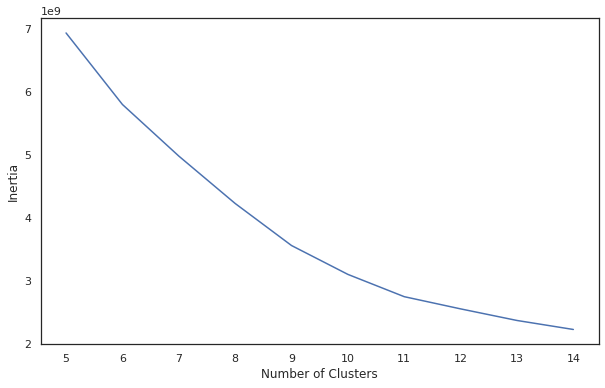

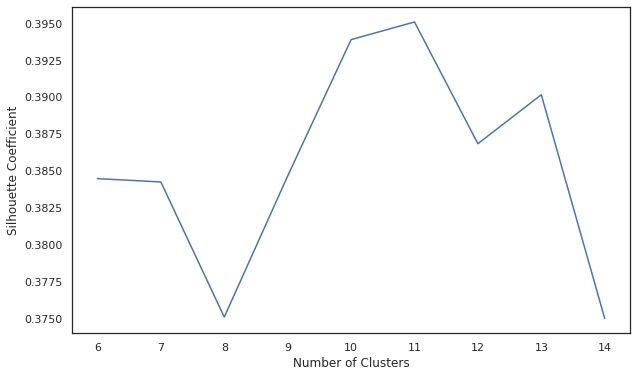

In [45]:
plot_elbow_graph(df3, k_range=range(5, 15))

plot_silhouette_graph(df3, k_range=range(6, 15)) 

## ** K - means Model 2 Plots**

In [46]:
km_model2 = KMeans(n_clusters=11, random_state=2).fit(df_numeric_Dataset)
clusters2 = km_model2.predict(df_numeric_Dataset)

km_2_df = df1.copy()

km_2_df ['clusters2'] = clusters2

km_2_df.loc[:,['clusters2','Gender']].value_counts().sort_index()









clusters2  Gender
0          Female     35
           Male       33
1          Female     58
           Male      122
2          Female     30
           Male       38
3          Female     74
           Male       92
4          Female     70
           Male      102
5          Female     23
           Male       37
6          Female     79
           Male      134
7          Female     71
           Male      104
8          Female     72
           Male       96
9          Female     45
           Male       61
10         Female     31
           Male       63
dtype: int64

Text(0.5, 1.0, 'Original data')

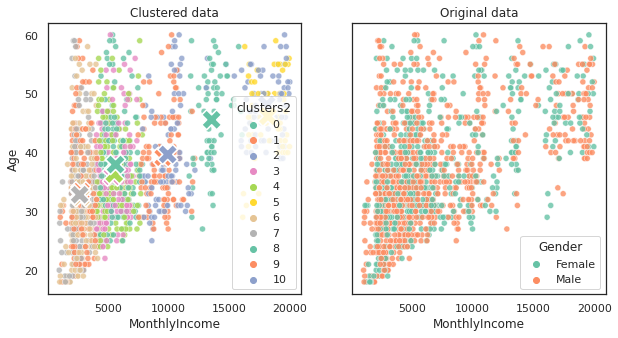

In [47]:
# setting the subplots, figure size and shared axes. the function returns a figure object and an array of axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharex=True, sharey=True)
# creating a scatterplot of the clustered data on the first sub-axes 
sns.scatterplot(data=km_2_df, x='MonthlyIncome', y='Age', hue='clusters2', palette='Set2', ax=axes[0], alpha=0.8)
# creating another scatter plot of the centroids on the first sub-axes
sns.scatterplot(x=km_model2.cluster_centers_[:,4], y=km_model2.cluster_centers_[:,1], hue=range(11), palette='Set2', ax=axes[0], legend=False, marker='X',s=400)
# setting the title for the first sub-axes
axes[0].set_title('Clustered data')

# creating a scatterplot of the true labeled data on the second sub-axes 
sns.scatterplot(data=km_2_df, x='MonthlyIncome', y='Age', hue='Gender', palette='Set2', ax=axes[1],alpha=0.8)
# setting the title for the second sub-axes
axes[1].set_title('Original data')

# ** 4. DBSCAN on the Dataset**

## ** Model 1 - Finding the Suitable Epsilon for all Columns**

In [48]:
min_samples = 20

# create a new instance of NearestNeighbors and assign it to the variable nbrs, setting the parameter n_neighbors=20
nbrs = NearestNeighbors(n_neighbors=20)
# Fit the nearest neighbors estimator on the moons data
nbrs.fit(df_numeric_Dataset)
# Find the 20 neighbors for every point, return indices of and distances to the neighbors of each point in sorted order.
distances, indices = nbrs.kneighbors(df_numeric_Dataset)
# remember that the index of the n-th element is n-1
k_distance = distances[:,  min_samples-1] # this is an array with the distance of every n-th neighbour
k_distance = np.sort(k_distance) # sort the array in ascending order

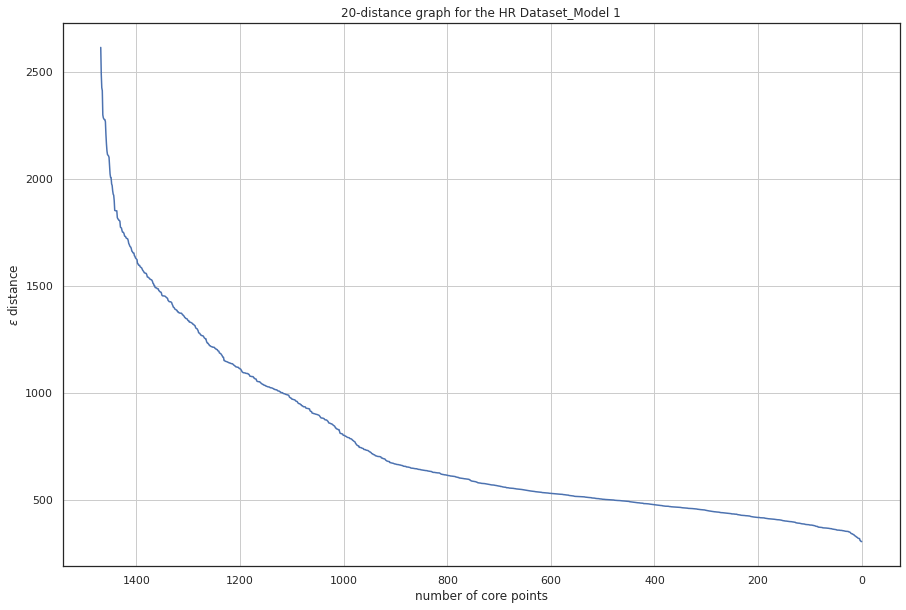

In [49]:
plt.figure(figsize=(15,10)) # create and define the figure
plt.plot(k_distance)
plt.title(f"{min_samples}-distance graph for the HR Dataset_Model 1")
plt.ylabel("$\epsilon$ distance")
plt.xlabel("number of core points")
plt.gca().invert_xaxis() # gca is used here to get the current axes, then invert the x axis
plt.grid(True) # add a grid to the plot
plt.show()

### **Plot the Data**

### **Create and fit the model on the data**

In [50]:
min_samples = 20
dbs_model = DBSCAN(eps=1600, min_samples=min_samples) # create a DBSCAN model
dbs_model.fit(df3) # fit the model on the data without the labels
clusters_DBSCAN1 = dbs_model.labels_ # return a cluster for every sample from the data
clusters_DBSCAN1

array([0, 0, 0, ..., 0, 0, 0])

### **Combine the cluster labels with Original Data and compare the clustering results with the other Lables**

In [51]:
km_1_dbscan = df1.copy()
km_1_dbscan ['clusters_DBSCAN1'] = clusters_DBSCAN1
km_1_dbscan

EmployeeID  Age Resigned     BusinessTravel BusinessUnit  \
0           2824   41      Yes      Travel_Rarely        Sales   
1           1409   49       No  Travel_Frequently  Consultants   
2           5506   37      Yes      Travel_Rarely  Consultants   
3           5012   33       No  Travel_Frequently  Consultants   
4           4657   27       No      Travel_Rarely  Consultants   
...          ...  ...      ...                ...          ...   
1465        7940   36       No  Travel_Frequently  Consultants   
1466        1886   39       No      Travel_Rarely  Consultants   
1467        3868   27       No      Travel_Rarely  Consultants   
1468        7925   49       No  Travel_Frequently        Sales   
1469        5556   34       No      Travel_Rarely  Consultants   

      EducationLevel  Gender  JobSatisfaction MaritalStatus  MonthlyIncome  \
0                  2  Female                4        Single           5993   
1                  1    Male                2       Married           5130   
2                  2    Male                3        Single           2090   
3                  4  Female                3       Married           2909   
4                  1    Male                2       Married           3468   
...              ...     ...              ...           ...            ...   
1465               2    Male                4       Married           2571   
1466               1    Male                1       Married           9991   
1467               3    Male                2       Married           6142   
1468               3    Male                2       Married           5390   
1469               3    Male                3       Married           4404   

      ...  PerformanceRating AverageWeeklyHoursWorked  TotalWorkingYears  \
0     ...                  3                     63.0                  8   
1     ...                  4                     40.0                 10   
2     ...                  3                     50.0                  7   
3     ...                  3                     48.0                  8   
4     ...                  3                     40.0                  6   
...   ...                ...                      ...                ...   
1465  ...                  3                     40.0                 17   
1466  ...                  3                     40.0                  9   
1467  ...                  4                     49.0                  6   
1468  ...                  3                     40.0                 17   
1469  ...                  3                     40.0                  6   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInRole  \
0                         0                1               6            4   
1                         3                3              10            7   
2                         3                3               0            0   
3                         3                3               8            7   
4                         3                3               2            2   
...                     ...              ...             ...          ...   
1465                      3                3               5            2   
1466                      5                3               7            7   
1467                      0                3               6            2   
1468                      3                2               9            6   
1469                      3                4               4            3   

      YearsSinceLastPromotion  YearsWithCurrManager  clusters_DBSCAN1  
0                           0                     5                 0  
1                           1                     7                 0  
2                           0                     0                 0  
3                           3                     0                 0  
4                           2                     2                 0  
...   

In [52]:
km_1_dbscan.loc[:,['clusters_DBSCAN1','Gender']].value_counts().sort_index().to_frame().rename({0:'count'}, axis=1)


count
clusters_DBSCAN1 Gender       
-1               Female      4
                 Male        6
 0               Female    531
                 Male      800
 1               Female     53
                 Male       76

### **Plot the Results**

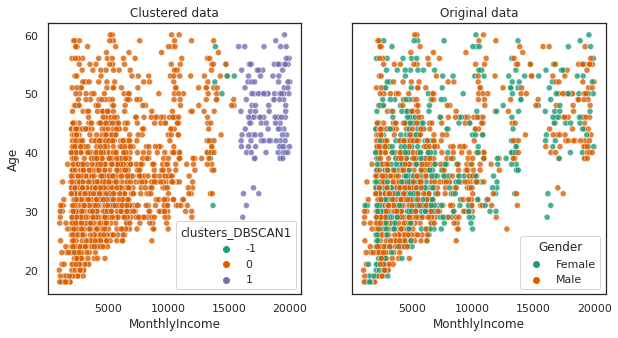

In [53]:
# Set the subplots, figure size and shared axes. The function returns a figure object and an array of axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharex=True, sharey=True)
# create a scatterplot of the clustered data on the first sub-axes 
sns.scatterplot(data=km_1_dbscan, x='MonthlyIncome', y='Age', hue='clusters_DBSCAN1', palette='Dark2', ax=axes[0], alpha=0.8)
# set the title for the first sub-axes
axes[0].set_title('Clustered data')

# create a scatterplot of the true labeled data on the second sub-axes 
sns.scatterplot(data= df1, x='MonthlyIncome', y='Age', hue='Gender', palette='Dark2', ax=axes[1],alpha=0.8)
# set the title for the second sub-axes
axes[1].set_title('Original data')

plt.show()



## ** Model 2 - Finding the Suitable Epsilon for Selected Subset Model**

In [54]:
min_samples = 80

# create a new instance of NearestNeighbors and assign it to the variable nbrs, setting the parameter n_neighbors=20
nbrs = NearestNeighbors(n_neighbors=80)
# Fit the nearest neighbors estimator on the moons data
nbrs.fit(df3)
# Find the 20 neighbors for every point, return indices of and distances to the neighbors of each point in sorted order.
distances, indices = nbrs.kneighbors(df3)
# remember that the index of the n-th element is n-1
k_distance = distances[:,  min_samples-1] # this is an array with the distance of every n-th neighbour
k_distance = np.sort(k_distance) # sort the array in ascending order

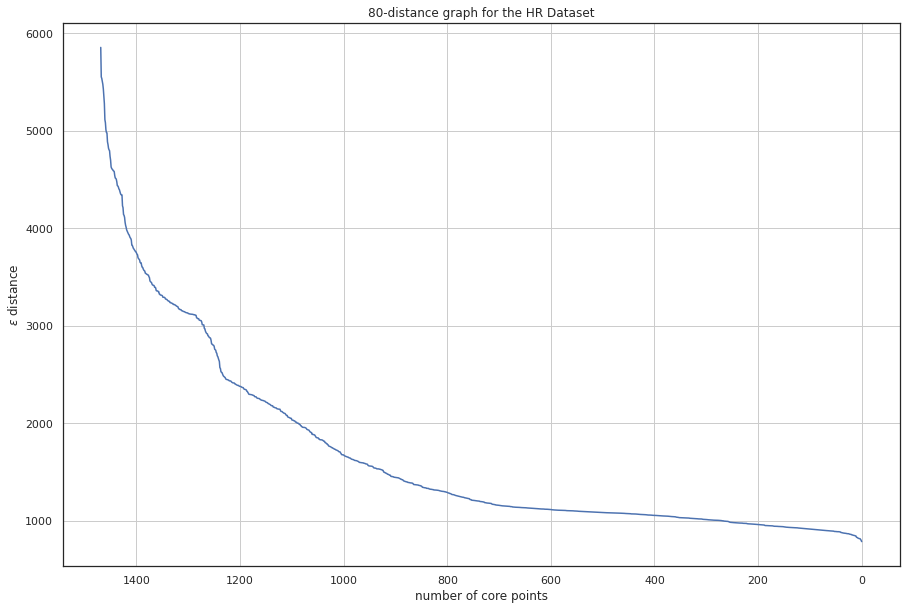

In [55]:
plt.figure(figsize=(15,10)) # create and define the figure
plt.plot(k_distance)
plt.title(f"{min_samples}-distance graph for the HR Dataset")
plt.ylabel("$\epsilon$ distance")
plt.xlabel("number of core points")
plt.gca().invert_xaxis() # gca is used here to get the current axes, then invert the x axis
plt.grid(True) # add a grid to the plot
plt.show()

In [56]:
min_samples = 80
dbs_model2 = DBSCAN(eps=2400, min_samples=min_samples) # create a DBSCAN model
dbs_model2.fit(df3) # fit the model on the data without the labels
clusters_DBSCAN2 = dbs_model2.labels_ # return a cluster for every sample from the data
clusters_DBSCAN2

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
km_2_dbscan = df1.copy()
km_2_dbscan ['clusters_DBSCAN2'] = clusters_DBSCAN2
km_2_dbscan
km_2_dbscan.loc[:,['clusters_DBSCAN2','Gender']].value_counts().sort_index().to_frame().rename({0:'count'}, axis=1)

count
clusters_DBSCAN2 Gender       
-1               Female     78
                 Male       98
 0               Female    510
                 Male      784

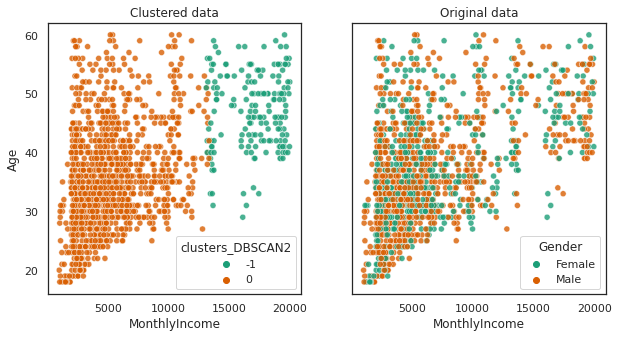

In [58]:
# Set the subplots, figure size and shared axes. The function returns a figure object and an array of axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharex=True, sharey=True)
# create a scatterplot of the clustered data on the first sub-axes 
sns.scatterplot(data=km_2_dbscan, x='MonthlyIncome', y='Age', hue='clusters_DBSCAN2', palette='Dark2', ax=axes[0], alpha=0.8)
# set the title for the first sub-axes
axes[0].set_title('Clustered data')

# create a scatterplot of the true labeled data on the second sub-axes 
sns.scatterplot(data= df1, x='MonthlyIncome', y='Age', hue='Gender', palette='Dark2', ax=axes[1],alpha=0.8)
# set the title for the second sub-axes
axes[1].set_title('Original data')

plt.show()

## ** Comparing the Models in Pivot Tables by Turnover Ratio**

In [59]:
table = pd.pivot_table(km_1_df, values='EmployeeID', index=['Resigned'],
                    columns=['cluster1'], aggfunc='count')
table

cluster1    0    1    2    3
Resigned                    
No        424  135  448  226
Yes        93    5  101   38

In [60]:
table = pd.pivot_table(km_2_df, values='EmployeeID', index=['Resigned'],
                    columns=['clusters2'], aggfunc='count')
table

clusters2  0    1   2    3    4   5    6    7    8   9   10
Resigned                                                   
No         62  135  65  147  151  58  159  135  152  87  82
Yes         6   45   3   19   21   2   54   40   16  19  12

In [61]:
table = pd.pivot_table(km_1_dbscan, values='EmployeeID', index=['Resigned'],
                    columns=['clusters_DBSCAN1'], aggfunc='count')
table

clusters_DBSCAN1    -1       0      1
Resigned                             
No                10.0  1099.0  124.0
Yes                NaN   232.0    5.0

In [62]:
table = pd.pivot_table(km_2_dbscan, values='EmployeeID', index=['Resigned'],
                    columns=['clusters_DBSCAN2'], aggfunc='count')
table

clusters_DBSCAN2   -1     0
Resigned                   
No                167  1066
Yes                 9   228

## ** Characteristics of Model 1**

In [63]:
Df_Model1=df_all_numeric

Df_Model1 ['cluster1'] = clusters1
Df_Model1


EmployeeID  Age Resigned     BusinessTravel BusinessUnit  \
0           2824   41      Yes      Travel_Rarely        Sales   
1           1409   49       No  Travel_Frequently  Consultants   
2           5506   37      Yes      Travel_Rarely  Consultants   
3           5012   33       No  Travel_Frequently  Consultants   
4           4657   27       No      Travel_Rarely  Consultants   
...          ...  ...      ...                ...          ...   
1465        7940   36       No  Travel_Frequently  Consultants   
1466        1886   39       No      Travel_Rarely  Consultants   
1467        3868   27       No      Travel_Rarely  Consultants   
1468        7925   49       No  Travel_Frequently        Sales   
1469        5556   34       No      Travel_Rarely  Consultants   

      EducationLevel  Gender  JobSatisfaction MaritalStatus  MonthlyIncome  \
0                  2  Female                4        Single           5993   
1                  1    Male                2       Married           5130   
2                  2    Male                3        Single           2090   
3                  4  Female                3       Married           2909   
4                  1    Male                2       Married           3468   
...              ...     ...              ...           ...            ...   
1465               2    Male                4       Married           2571   
1466               1    Male                1       Married           9991   
1467               3    Male                2       Married           6142   
1468               3    Male                2       Married           5390   
1469               3    Male                3       Married           4404   

      ...  YearsInRole YearsSinceLastPromotion  YearsWithCurrManager  \
0     ...            4                       0                     5   
1     ...            7                       1                     7   
2     ...            0                       0                     0   
3     ...            7                       3                     0   
4     ...            2                       2                     2   
...   ...          ...                     ...                   ...   
1465  ...            2                       0                     3   
1466  ...            7                       1                     7   
1467  ...            2                       0                     3   
1468  ...            6                       0                     8   
1469  ...            3                       1                     2   

      Gender_Code  Resigned_Code  BusinessTravel_Code  BusinessUnit_Code  \
0               0              1                    2                  2   
1               1              0                    1                  1   
2               1              1                    2                  1   
3               0              0                    1                  1   
4               1              0                    2                  1   
...           ...            ...                  ...                ...   
1465            1              0                    1                  1   
1466            1              0                    2                  1   
1467            1              0                    2                  1   
1468            1              0                    1                  2   
1469            1              0                    2                  1   

      MaritalStatus_Code  OverTime_Code  cluster1  
0                      2              1         2  
1                      1              0         2  
2                      2              1         0  
3                      1              1         2  
4                      1              0         2  
...                  ...            ...       ...  
1465                   1              0         0  
1466                   1              0         3  
1467                   1      

### **Subset of Clusters in PIVOT**

In [64]:
table1 = pd.pivot_table(data=Df_Model1,index=['cluster1','Resigned_Code'], sort =True)
table1 = table1 [["MonthlyIncome","JobSatisfaction","WorkLifeBalance","AverageWeeklyHoursWorked","YearsAtCompany","YearsSinceLastPromotion"]]
np.round(table1,0)


MonthlyIncome  JobSatisfaction  WorkLifeBalance  \
cluster1 Resigned_Code                                                    
0        0                     4222.0              3.0              3.0   
         1                     3243.0              2.0              3.0   
1        0                    17828.0              3.0              3.0   
         1                    19464.0              2.0              3.0   
2        0                     4167.0              3.0              3.0   
         1                     3457.0              2.0              3.0   
3        0                    10448.0              3.0              3.0   
         1                    10171.0              2.0              3.0   

                        AverageWeeklyHoursWorked  YearsAtCompany  \
cluster1 Resigned_Code                                             
0        0                                  42.0             6.0   
         1                                  47.0             4.0   
1        0                                  42.0            14.0   
         1                                  47.0            23.0   
2        0                                  42.0             6.0   
         1                                  47.0             4.0   
3        0                                  43.0            10.0   
         1                                  46.0            10.0   

                        YearsSinceLastPromotion  
cluster1 Resigned_Code                           
0        0                                  2.0  
         1                                  1.0  
1        0                                  5.0  
         1                                  7.0  
2        0                                  2.0  
         1                                  1.0  
3        0                                  3.0  
         1                                  4.0

### **All Columns of Clusters in PIVOT**

In [65]:
table2 = pd.pivot_table(data=Df_Model1,index=['cluster1','Resigned_Code'], sort =True)

np.round(table2,0)

Age  AverageWeeklyHoursWorked  BusinessTravel_Code  \
cluster1 Resigned_Code                                                        
0        0              35.0                      42.0                  2.0   
         1              31.0                      47.0                  2.0   
1        0              47.0                      42.0                  2.0   
         1              50.0                      47.0                  2.0   
2        0              35.0                      42.0                  2.0   
         1              32.0                      47.0                  2.0   
3        0              40.0                      43.0                  2.0   
         1              41.0                      46.0                  2.0   

                        BusinessUnit_Code  EducationLevel  EmployeeID  \
cluster1 Resigned_Code                                                  
0        0                            1.0             3.0      7711.0   
         1                            1.0             3.0      7466.0   
1        0                            1.0             3.0      5580.0   
         1                            1.0             3.0      5873.0   
2        0                            1.0             3.0      3255.0   
         1                            1.0             3.0      3087.0   
3        0                            1.0             3.0      5865.0   
         1                            2.0             3.0      6078.0   

                        Gender_Code  JobSatisfaction  MaritalStatus_Code  \
cluster1 Resigned_Code                                                     
0        0                      1.0              3.0                 1.0   
         1                      1.0              2.0                 1.0   
1        0                      1.0              3.0                 1.0   
         1                      0.0              2.0                 1.0   
2        0                      1.0              3.0                 1.0   
         1                      1.0              2.0                 1.0   
3        0                      1.0              3.0                 1.0   
         1                      1.0              2.0                 1.0   

                        MonthlyIncome  ...  OverTime_Code  PercentSalaryHike  \
cluster1 Resigned_Code                 ...                                     
0        0                     4222.0  ...            0.0               15.0   
         1                     3243.0  ...            1.0               15.0   
1        0                    17828.0  ...            0.0               15.0   
         1                    19464.0  ...            1.0               14.0   
2        0                     4167.0  ...            0.0               15.0   
         1                     3457.0  ...            1.0               15.0   
3        0                    10448.0  ...            0.0               15.0   
         1                    10171.0  ...            0.0               14.0   

                        PerformanceRating  TotalWorkingYears  \
cluster1 Resigned_Code                                         
0        0                            3.0                9.0   
         1                            3.0                6.0   
1        0                            3.0               26.0   
         1                            3.0               29.0   
2        0                            3.0                9.0   
         1                            3.0                6.0   
3        0                            3.0               16.0   
         1                            3.0               16.0   

                        TrainingTimesLastYear  WorkLifeBalance  \
cluster1 Resigned_Code                                           
0        0                                3.0              3.0   
         1                                3.0              3.0   
1        0                          

In [66]:
Df_Model1["Resigned_Code"].value_counts()


0    1233
1     237
Name: Resigned_Code, dtype: int64

In [67]:
Df_Model1["MaritalStatus_Code"].value_counts()

1    673
2    470
0    327
Name: MaritalStatus_Code, dtype: int64

In [68]:
Df_Model1["Gender_Code"].value_counts()

1    882
0    588
Name: Gender_Code, dtype: int64

## ** Cluster Analysis- Model 1**

In [69]:
model1_clusters=km_1_df
model1_clusters=  model1_clusters[(model1_clusters["cluster1"] == 0)| (model1_clusters["cluster1"]== 2)]

model1_clusters

EmployeeID  Age Resigned     BusinessTravel BusinessUnit  \
0           2824   41      Yes      Travel_Rarely        Sales   
1           1409   49       No  Travel_Frequently  Consultants   
2           5506   37      Yes      Travel_Rarely  Consultants   
3           5012   33       No  Travel_Frequently  Consultants   
4           4657   27       No      Travel_Rarely  Consultants   
...          ...  ...      ...                ...          ...   
1464        2837   26       No      Travel_Rarely        Sales   
1465        7940   36       No  Travel_Frequently  Consultants   
1467        3868   27       No      Travel_Rarely  Consultants   
1468        7925   49       No  Travel_Frequently        Sales   
1469        5556   34       No      Travel_Rarely  Consultants   

      EducationLevel  Gender  JobSatisfaction MaritalStatus  MonthlyIncome  \
0                  2  Female                4        Single           5993   
1                  1    Male                2       Married           5130   
2                  2    Male                3        Single           2090   
3                  4  Female                3       Married           2909   
4                  1    Male                2       Married           3468   
...              ...     ...              ...           ...            ...   
1464               3  Female                3        Single           2966   
1465               2    Male                4       Married           2571   
1467               3    Male                2       Married           6142   
1468               3    Male                2       Married           5390   
1469               3    Male                3       Married           4404   

      ...  PerformanceRating AverageWeeklyHoursWorked  TotalWorkingYears  \
0     ...                  3                     63.0                  8   
1     ...                  4                     40.0                 10   
2     ...                  3                     50.0                  7   
3     ...                  3                     48.0                  8   
4     ...                  3                     40.0                  6   
...   ...                ...                      ...                ...   
1464  ...                  3                     40.0                  5   
1465  ...                  3                     40.0                 17   
1467  ...                  4                     49.0                  6   
1468  ...                  3                     40.0                 17   
1469  ...                  3                     40.0                  6   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInRole  \
0                         0                1               6            4   
1                         3                3              10            7   
2                         3                3               0            0   
3                         3                3               8            7   
4                         3                3               2            2   
...                     ...              ...             ...          ...   
1464                      2                3               4            2   
1465                      3                3               5            2   
1467                      0                3               6            2   
1468                      3                2               9            6   
1469                      3                4               4            3   

      YearsSinceLastPromotion  YearsWithCurrManager  cluster1  
0                           0                     5         2  
1                           1                     7         2  
2                           0                     0         0  
3                           3                     0         2  
4                           2                     2         2  
...                       ...                   ...   

In [70]:

model1_clusters["Gender"].value_counts()

Male      644
Female    422
Name: Gender, dtype: int64

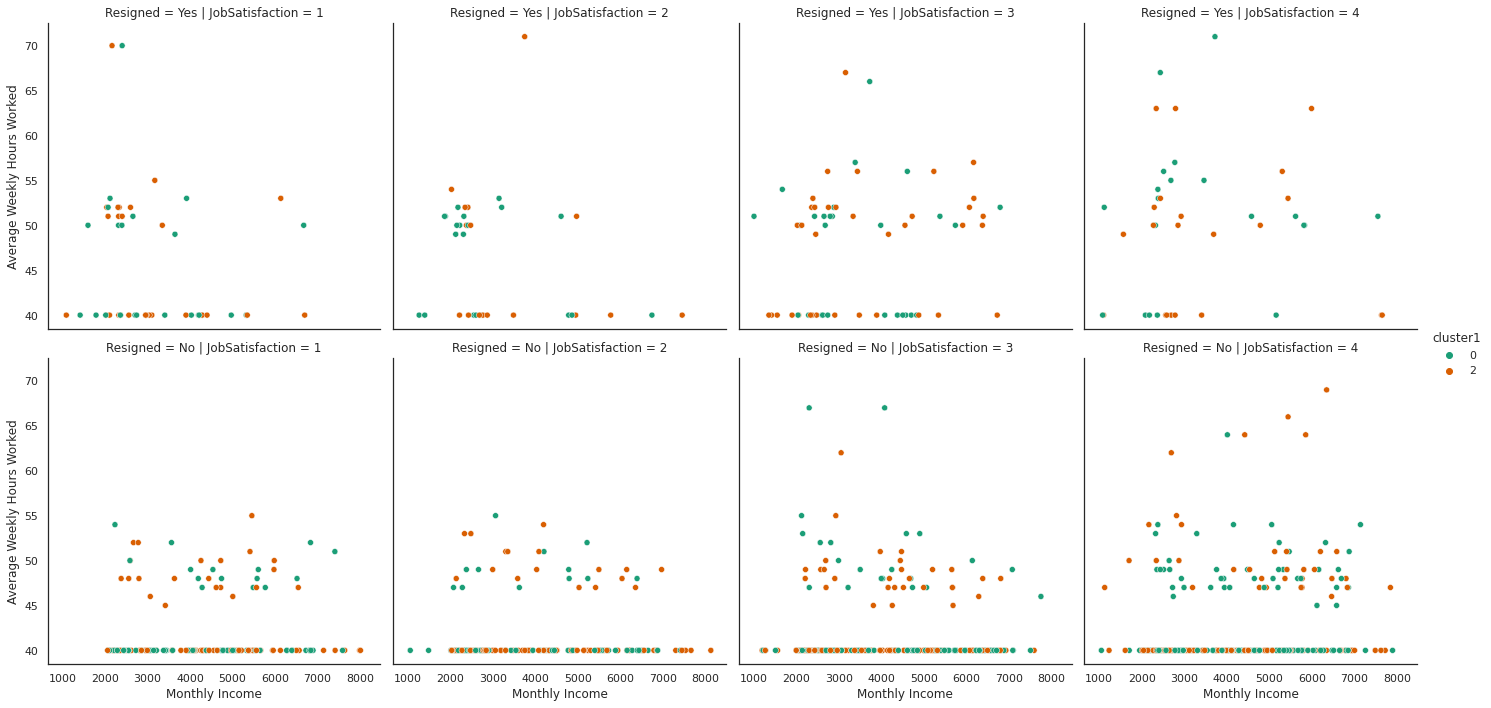

In [71]:
g= sns.relplot(x= "MonthlyIncome", y = "AverageWeeklyHoursWorked",data = model1_clusters, hue ="cluster1",row = "Resigned",col = "JobSatisfaction",palette ="Dark2" ).set(xlabel = "Monthly Income",ylabel = "Average Weekly Hours Worked")

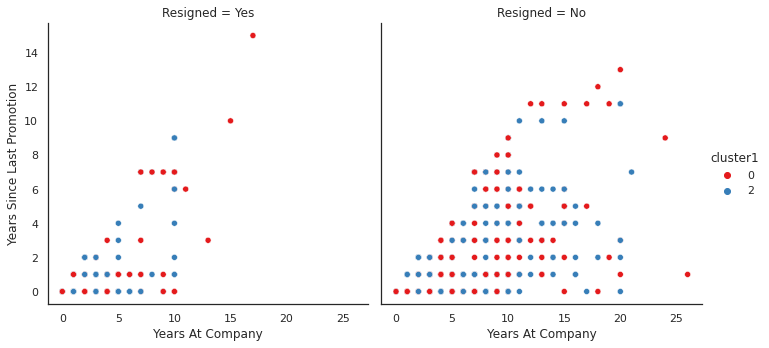

In [72]:
g= sns.relplot(x= "YearsAtCompany", y = "YearsSinceLastPromotion",data = model1_clusters, hue ="cluster1",col = "Resigned",palette ="Set1" ).set(xlabel = "Years At Company",ylabel = "Years Since Last Promotion")

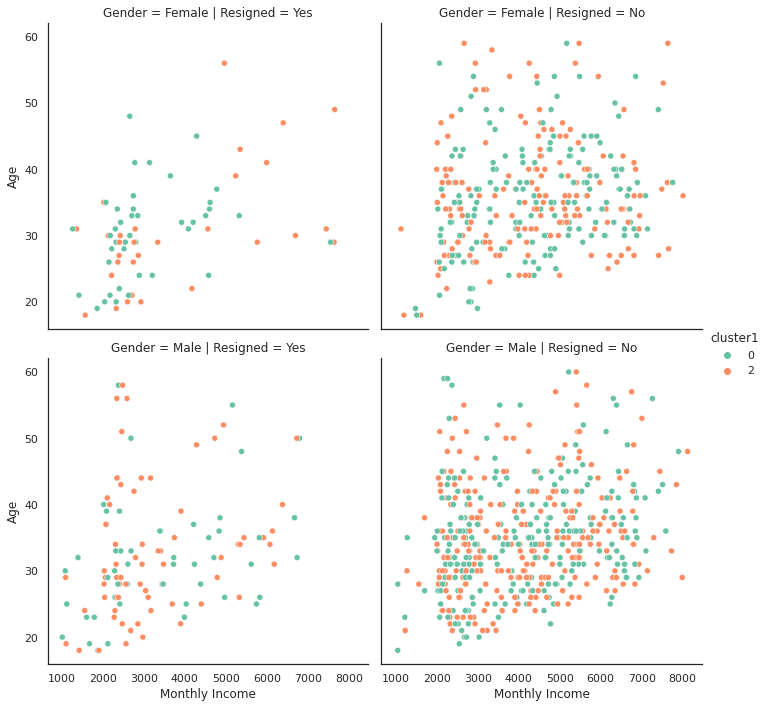

In [73]:
g= sns.relplot(x= "MonthlyIncome", y = "Age",data = model1_clusters, hue ="cluster1",col = "Resigned", row ="Gender",palette ="Set2" ).set(xlabel = "Monthly Income",ylabel = "Age")

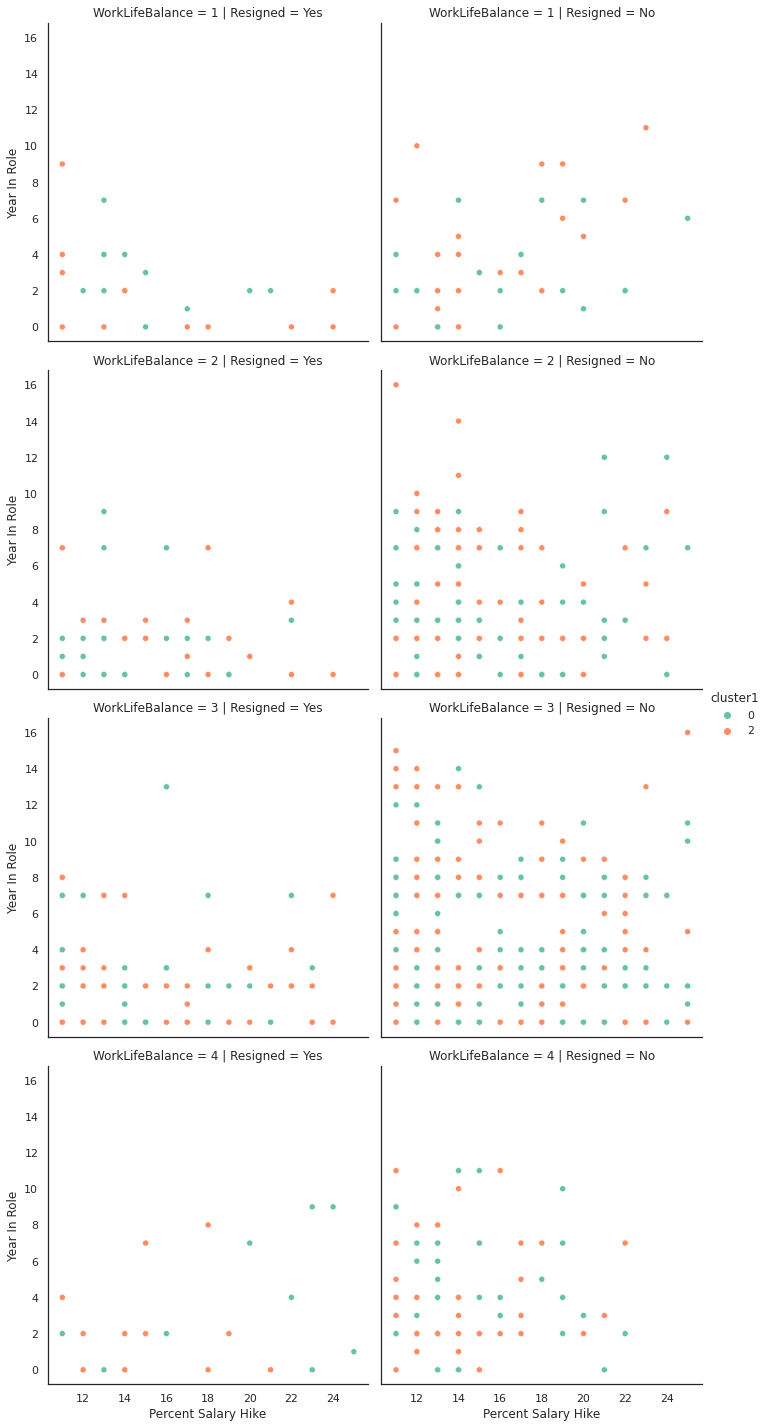

In [74]:
g= sns.relplot(x= "PercentSalaryHike", y = "YearsInRole",data = model1_clusters, hue ="cluster1",col = "Resigned", row ="WorkLifeBalance",palette ="Set2" ).set(xlabel = "Percent Salary Hike",ylabel = "Year In Role")

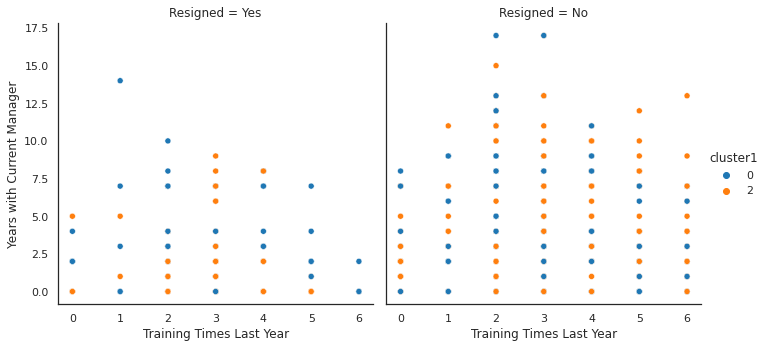

In [75]:
g= sns.relplot(x= "TrainingTimesLastYear", y = "YearsWithCurrManager",data = model1_clusters, hue ="cluster1",col = "Resigned",palette ="tab10" ).set(xlabel = "Training Times Last Year",ylabel = "Years with Current Manager") 